

### Chapter 3 : Section 1 Business Understanding



In [2]:
# Loading the necessary library files
import pandas as pd


##### Exercise Step 2 : 

Let us now load the csv file which is a ; seperated data and then get the head of the data

In [3]:
# Loading data from the drive

# Please change the filename as per the location where the file is stored
filename = 'D:/bank/bank-full.csv'
# Loading the data u'sing pandas

bankData = pd.read_csv(filename,sep=";")
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


###### Exercise : Step 3

Let us now get a feel of the data by printing the shape of the data set and also getting the summary statistics of the numerical data

In [4]:
# Printing the shape of the data 
print(bankData.shape)
# Summarizing the statistics of the numerical raw data

bankData.describe()

(45211, 17)


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##### Exercise 2 : Exploratory analysis for age v/s propensity to buy term deposits

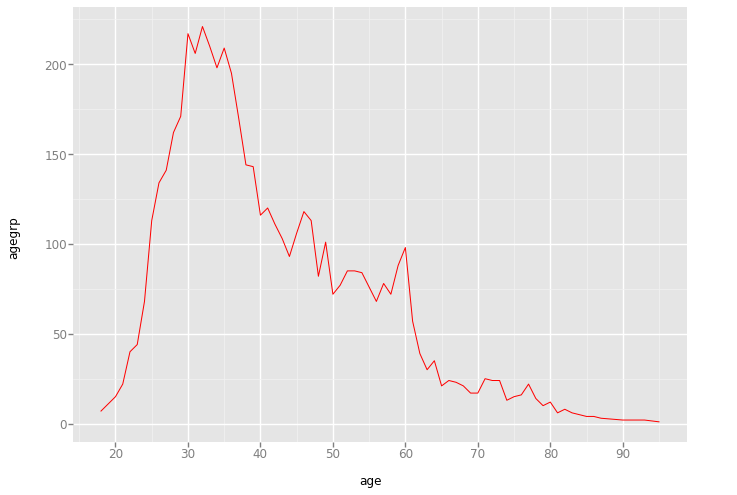

<ggplot: (146920155133)>

In [7]:
from dfply import *

from ggplot import *

# Grouping the banking data using piping function
bankSub1 = (bankData >> mask(X.y == 'yes') >> group_by(X.age) >> summarise(agegrp = X.y.count()))

# Visualising the relationship using ggplot

ggplot(bankSub1,aes('age','agegrp')) +  geom_line(color = 'red')

###### Normalising data

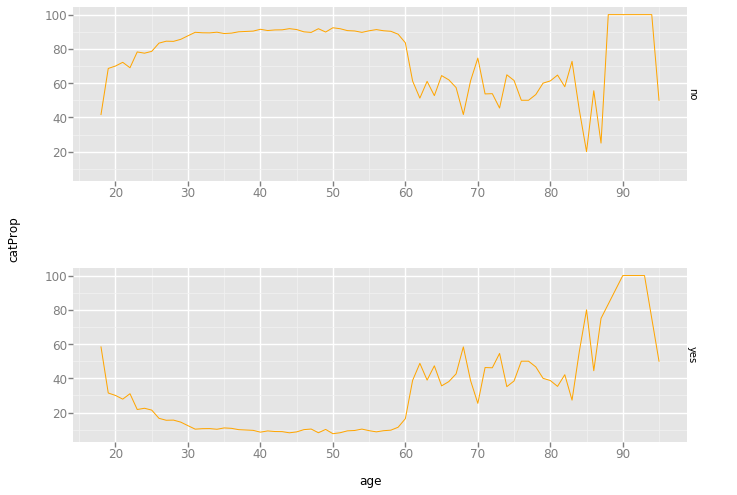

<ggplot: (143686319252)>

In [8]:
# Getting another perspective

ageTot = (bankData >> group_by(X.age) >> summarise(ageTot = X.y.count()))

# Getting all the details in one place

ageProp = (bankData >> group_by(X.age,X.y) >> summarise(ageCat = X.y.count()))

# Merging both the data frames
ageComb = (pd.merge(ageProp,ageTot,left_on = ['age'],right_on = ['age']) >> mutate(catProp = (X.ageCat/X.ageTot)*100))

# Creating the ggplot to visualise the trend


ggplot(ageComb,aes('age','catProp')) + geom_line(color='orange') + facet_grid('y')        
           


###### Activity 1 : Employment status v/s propensity to buy

In [9]:
# Getting the total counts under each job category

jobTot = (bankData >> group_by(X.job) >> summarise(jobTot = X.y.count()))
jobTot

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


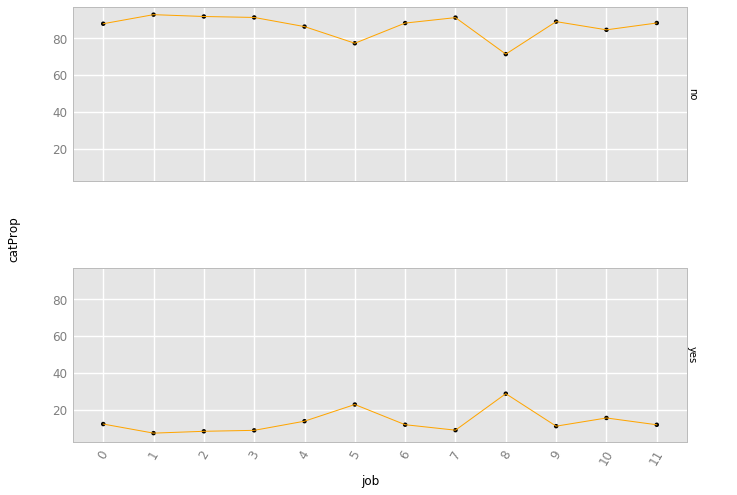

<ggplot: (-9223371893168180343)>

In [12]:
# Getting all the details in one place

jobProp = (bankData >> group_by(X.job,X.y) >> summarise(jobCat = X.y.count()))

# Merging both the data frames
jobComb = (pd.merge(jobProp,jobTot,left_on = ['job'],right_on = ['job']) >> mutate(catProp = (X.jobCat/X.jobTot)*100))

# Creating the ggplot to visualise the trend


p = ggplot(jobComb,aes('job','catProp')) + geom_point() + geom_line(color= 'orange' ) + facet_grid('y') 

p + theme(axis_text_x = element_text(angle=60, hjust=1,vjust = 0.5))

##### Feature Engineering

###### Exercise 3 : Asset Portfolio v/s Propensity for term loans


In [8]:
# Relationship between housing and propensity for term deposits
(bankData >> group_by(X.housing,X.y) >> summarise(houseTot = X.y.count()))

,y,housing,houseTot
0,no,no,16727
1,yes,no,3354
2,no,yes,23195
3,yes,yes,1935


In [9]:
# Relationship between having a loan and propensity for term deposits
(bankData) >> group_by(X.loan,X.y) >> summarise(loanTot = X.y.count())

,y,loan,loanTot
0,no,no,33162
1,yes,no,4805
2,no,yes,6760
3,yes,yes,484


In [30]:
# Taking the quantiles for 25%, 50% and 75% of the balance data
import numpy as np
np.quantile(bankData['balance'],[0.25,0.5,0.75])

array([  72.,  448., 1428.])

In [14]:
# Creating new features for bank data based on the quantile values

bankData['balanceClass'] = 'Quant1'

bankData.balanceClass[(bankData['balance'] > 72) & (bankData['balance'] < 448)] = 'Quant2'

bankData.balanceClass[(bankData['balance'] > 448) & (bankData['balance'] < 1428)] = 'Quant3'

bankData.balanceClass[bankData['balance'] > 1428] = 'Quant4'

bankData.head()

C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1


In [21]:
# Calculating the customers under each quantile 
balanceTot = (bankData >> group_by(X.balanceClass) >> summarise(balanceTot = X.y.count()))
balanceTot

,balanceClass,balanceTot
0,Quant1,11340
1,Quant2,11275
2,Quant3,11299
3,Quant4,11297


In [22]:
# Calculating the total customers categorised as per quantile and propensity classification
balanceProp = (bankData >> group_by(X.balanceClass,X.y) >> summarise(balanceCat = X.y.count()))
balanceProp

,y,balanceClass,balanceCat
0,no,Quant1,10517
1,yes,Quant1,823
2,no,Quant2,10049
3,yes,Quant2,1226
4,no,Quant3,9884
5,yes,Quant3,1415
6,no,Quant4,9472
7,yes,Quant4,1825


In [19]:
# Merging both the data frames
balanceComb = (pd.merge(balanceProp,balanceTot,left_on = ['balanceClass'],right_on = ['balanceClass']) >> mutate(catProp = (X.balanceCat/X.balanceTot)*100))
balanceComb

,y,balanceClass,balanceCat,balanceTot,catProp
0,no,Quant1,10517,11340,92.742504
1,yes,Quant1,823,11340,7.257496
2,no,Quant2,10049,11275,89.126386
3,yes,Quant2,1226,11275,10.873614
4,no,Quant3,9884,11299,87.476768
5,yes,Quant3,1415,11299,12.523232
6,no,Quant4,9472,11297,83.845269
7,yes,Quant4,1825,11297,16.154731


In [23]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1


In [37]:
# Normalising data
from sklearn import preprocessing
x = bankData[['balance']].values.astype(float)
# Creating the scaling function
minmaxScaler = preprocessing.MinMaxScaler()
# Transforming the balance data by normalising it with minmaxScalre
bankData['balanceTran'] = minmaxScaler.fit_transform(x)
# Printing the head of the data
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092259,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073067,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086476,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072812,5,1,0.364112,Quant1


In [25]:
# Adding a small numerical constant to eliminate 0 values

bankData['balanceTran'] = bankData['balanceTran'] + 0.00001

In [38]:
# Let us transform values for loan data
bankData['loanTran'] = 1
# Giving a weight of 5 if there is no loan
bankData.loanTran[bankData['loan'] == 'no'] = 5
bankData.head()

C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092259,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073067,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086476,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072812,5,1,0.364112,Quant1


In [39]:
# Let us transform values for Housing data
bankData['houseTran'] = 5
# Giving a weight of 1 if the customer has a house
bankData.houseTran[bankData['housing'] == 'no'] = 1

C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [40]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092259,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073067,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086476,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072812,5,1,0.364112,Quant1


In [41]:
# Let us now create the new variable which is a product of all these
bankData['assetIndex'] = bankData['balanceTran'] * bankData['loanTran'] * bankData['houseTran']
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092259,5,5,2.306484,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073067,5,5,1.826666,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,1,5,0.364108,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086476,5,5,2.161903,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072812,5,1,0.364062,Quant1


In [42]:
# Finding the quantile
np.quantile(bankData['assetIndex'],[0.25,0.5,0.75])

array([0.37663646, 0.56915367, 1.9024749 ])

In [32]:
# Creating quantiles from the assetindex data
bankData['assetClass'] = 'Quant1'

bankData.assetClass[(bankData['assetIndex'] > 0.38) & (bankData['assetIndex'] < 0.57)] = 'Quant2'

bankData.assetClass[(bankData['assetIndex'] > 0.57) & (bankData['assetIndex'] < 1.9)] = 'Quant3'

bankData.assetClass[bankData['assetIndex'] > 1.9] = 'Quant4'

bankData.head()

C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112,Quant1


In [36]:
# Calculating total of each asset class
assetTot = (bankData >> group_by(X.assetClass) >> summarise(assetTot = X.y.count()))
# Calculating the category wise counts
assetProp = (bankData >> group_by(X.assetClass,X.y) >> summarise(assetCat = X.y.count()))
# Merging both the data frames
assetComb = (pd.merge(assetProp,assetTot,left_on = ['assetClass'],right_on = ['assetClass']) >> mutate(catProp = (X.assetCat/X.assetTot)*100))
assetComb


,y,assetClass,assetCat,assetTot,catProp
0,no,Quant1,10921,12212,89.428431
1,yes,Quant1,1291,12212,10.571569
2,no,Quant2,8436,10400,81.115385
3,yes,Quant2,1964,10400,18.884615
4,no,Quant3,10144,11121,91.214819
5,yes,Quant3,977,11121,8.785181
6,no,Quant4,10421,11478,90.791079
7,yes,Quant4,1057,11478,9.208921


###### Data Driven Feature Engineering

In [101]:
# Looking at Data types
print(bankData.dtypes)

# Looking at descriptive statistics

print(bankData.describe())


age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
balanceClass     object
balanceTran     float64
loanTran          int64
houseTran         int64
assetIndex      float64
assetClass       object
dtype: object
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000

In [104]:
# Correlation between numeric attributes
from pandas import set_option
bankNumeric = bankData[['age','balance','day','duration','campaign','pdays','previous','balanceTran','loanTran','houseTran','assetIndex']]
set_option('display.width',150)
set_option('precision',3)
bankCorr = bankNumeric.corr(method = 'pearson')
bankCorr

,age,balance,day,duration,campaign,pdays,previous,balanceTran,loanTran,houseTran,assetIndex
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001,0.098,0.016,-0.186,-0.112
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017,1.000,0.084,-0.069,0.311
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052,0.005,-0.011,-0.028,-0.019
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001,0.022,0.012,0.005,0.017
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033,-0.015,-0.010,-0.024,-0.026
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455,0.003,0.023,0.124,0.101
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000,0.017,0.011,0.037,0.034
balanceTran,0.098,1.000,0.005,0.022,-0.015,0.003,0.017,1.000,0.084,-0.069,0.311
loanTran,0.016,0.084,-0.011,0.012,-0.010,0.023,0.011,0.084,1.000,-0.041,0.416
houseTran,-0.186,-0.069,-0.028,0.005,-0.024,0.124,0.037,-0.069,-0.041,1.000,0.740


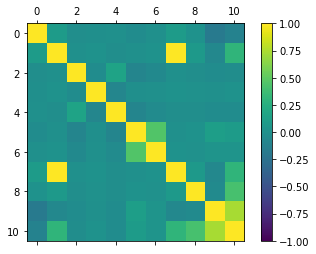

In [113]:
# Plotting the correlation matrix

corFig = pyplot.figure()
figAxis = corFig.add_subplot(111)
corAx = figAxis.matshow(bankCorr,vmin=-1,vmax=1)
corFig.colorbar(corAx)
pyplot.show()

In [105]:
# Skewness of numeric attributes

bankNumeric.skew()

age             0.685
balance         8.360
day             0.093
duration        3.144
campaign        4.899
pdays           2.616
previous       41.846
balanceTran     8.360
loanTran       -1.853
houseTran      -0.225
assetIndex      1.221
dtype: float64

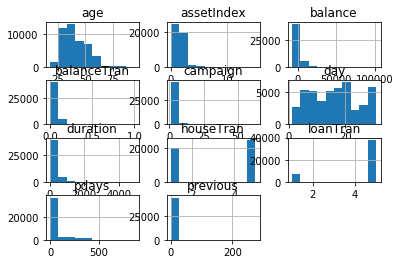

In [107]:
# Histograms
from matplotlib import pyplot
bankNumeric.hist()
pyplot.show()

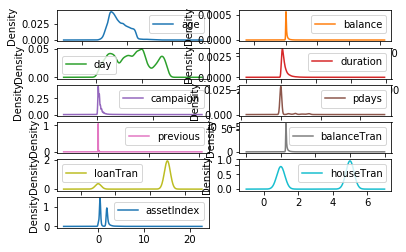

In [112]:
# Density plots
bankNumeric.plot(kind = 'density',subplots = True,layout = (6,2),sharex = False)
pyplot.show()

###### Other Standardizing Techniques


In [115]:
# Standardize data ( 0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

scaling = StandardScaler().fit(bankNumeric)
rescaledNum = scaling.transform(bankNumeric)

set_printoptions(precision = 3)
print(rescaledNum)

[[ 1.607  0.256 -1.298 ...  0.437  0.894  1.184]
 [ 0.289 -0.438 -1.298 ...  0.437  0.894  0.68 ]
 [-0.747 -0.447 -1.298 ... -2.289  0.894 -0.856]
 ...
 [ 2.925  1.43   0.143 ...  0.437 -1.119 -0.584]
 [ 1.513 -0.228  0.143 ...  0.437 -1.119 -0.824]
 [-0.371  0.528  0.143 ...  0.437 -1.119 -0.714]]


C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [116]:
# Normalizing Data ( Lenght of 1)
from sklearn.preprocessing import Normalizer
normaliser = Normalizer().fit(bankNumeric)
normalisedNum = normaliser.transform(bankNumeric)

set_printoptions(precision = 3)
print(normalisedNum)

[[2.686e-02 9.923e-01 2.315e-03 ... 2.315e-03 2.315e-03 1.068e-03]
 [2.747e-01 1.810e-01 3.121e-02 ... 3.121e-02 3.121e-02 1.140e-02]
 [3.966e-01 2.404e-02 6.010e-02 ... 1.202e-02 6.010e-02 4.376e-03]
 ...
 [1.235e-02 9.805e-01 2.917e-03 ... 8.579e-04 1.716e-04 1.070e-04]
 [6.775e-02 7.940e-01 2.021e-02 ... 5.943e-03 1.189e-03 4.687e-04]
 [1.234e-02 9.906e-01 5.668e-03 ... 1.667e-03 3.334e-04 1.663e-04]]


#### Logistic Regression Model



In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [44]:
# Finding the data types
bankData.dtypes

age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
balanceClass     object
balanceTran     float64
loanTran          int64
houseTran         int64
assetIndex      float64
assetClass       object
dtype: object

In [48]:
# Converting all the categorical variables to dummy variables
bankCat = pd.get_dummies(bankData[['job','marital','education','default','housing','loan','contact','month','poutcome']])


In [49]:
bankCat.shape

(45211, 44)

In [61]:
# Seperating the numerical variables
bankNum = bankData[['age','balance','day','duration','campaign','pdays','previous']]
bankNum.shape

(45211, 7)

In [54]:
# Preparing the X variables
X = pd.concat([bankCat, bankNum], axis=1)
print(X.shape)
# Preparing the Y variable
Y = bankData['y']
print(Y.shape)
X.head()

(45211, 51)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,58,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,44,29,5,151,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,33,2,5,76,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,47,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,33,1,5,198,1,-1,0


In [55]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# Defining the LogisticRegression function
bankModel = LogisticRegression()
bankModel.fit(X_train, y_train)

C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
pred = bankModel.predict(X_test)
print('Accuracy of Logisticr regression model prediction on test set: {:.2f}'.format(bankModel.score(X_test, y_test)))

Accuracy of Logisticr regression model prediction on test set: 0.90


In [58]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[11640   329]
 [ 1042   553]]


In [88]:
len(pred[pred == 'yes'])

866

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94     11969
         yes       0.63      0.35      0.45      1595

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



###### Model with Feature Engineering


In [60]:
# Categorical variables, removing loan and housing
bankCat1 = pd.get_dummies(bankData[['job','marital','education','default','contact','month','poutcome']])

In [90]:
bankNum1 = bankData[['age','day','duration','campaign','pdays','previous','assetIndex']]
bankNum1.head()

,age,day,duration,campaign,pdays,previous,assetIndex
0,58,5,261,1,-1,0,2.306484
1,44,5,151,1,-1,0,1.826666
2,33,5,76,1,-1,0,0.364108
3,47,5,92,1,-1,0,2.161903
4,33,5,198,1,-1,0,0.364062


In [95]:
# Normalise some of the numerical variables
from sklearn import preprocessing
# Creating the scaling function
minmaxScaler = preprocessing.MinMaxScaler()
# Creating the transformation variables
ageT1 = bankNum1[['age']].values.astype(float)
dayT1 = bankNum1[['day']].values.astype(float)
durT1 = bankNum1[['duration']].values.astype(float)

# Transforming the balance data by normalising it with minmaxScalre
bankNum1['ageTran'] = minmaxScaler.fit_transform(ageT1)
bankNum1['dayTran'] = minmaxScaler.fit_transform(dayT1)
bankNum1['durTran'] = minmaxScaler.fit_transform(durT1)

# Let us create a new numerical variable by selecting the transformed variables
bankNum2 = bankNum1[['ageTran','dayTran','durTran','campaign','pdays','previous','assetIndex']]

# Printing the head of the data
bankNum2.head()

C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,ageTran,dayTran,durTran,campaign,pdays,previous,assetIndex
0,0.519481,0.133333,0.053070,1,-1,0,2.306484
1,0.337662,0.133333,0.030704,1,-1,0,1.826666
2,0.194805,0.133333,0.015453,1,-1,0,0.364108
3,0.376623,0.133333,0.018707,1,-1,0,2.161903
4,0.194805,0.133333,0.040260,1,-1,0,0.364062


In [96]:
# Preparing the X variables
X = pd.concat([bankCat1, bankNum2], axis=1)
print(X.shape)
# Preparing the Y variable
Y = bankData['y']
print(Y.shape)
X.head()

(45211, 47)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,ageTran,dayTran,durTran,campaign,pdays,previous,assetIndex
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0.519481,0.133333,0.053070,1,-1,0,2.306484
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0.337662,0.133333,0.030704,1,-1,0,1.826666
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0.194805,0.133333,0.015453,1,-1,0,0.364108
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0.376623,0.133333,0.018707,1,-1,0,2.161903
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.194805,0.133333,0.040260,1,-1,0,0.364062


In [97]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# Defining the LogisticRegression function
bankModel = LogisticRegression()
bankModel.fit(X_train, y_train)

C:\Users\thoma\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
pred = bankModel.predict(X_test)
print('Accuracy of Logisticr regression model prediction on test set: {:.2f}'.format(bankModel.score(X_test, y_test)))

Accuracy of Logisticr regression model prediction on test set: 0.90


In [99]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[11677   292]
 [ 1086   509]]


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94     11969
         yes       0.64      0.32      0.42      1595

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564

